In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://api.covid19india.org/data.json")
data1 = response.json()
response1 = requests.get("https://thecampfire.in/api/daily_state_count")
data2 = response1.json()

In [3]:
state_list = []
for i in range (0, len(data2)-1):
    state_names = (data2[i][0])
    state_confirmed = (int(data2[i][1]['confirmed']))
    state_deaths = (int(data2[i][1]['deaths']))
    state_active = (int(data2[i][1]['active']))
    state_list.append([state_names,state_confirmed,state_deaths,state_active])
state_data = pd.DataFrame(state_list,
              columns=['States','Confirmed_Cases', 'Deaths','Active'])

In [4]:
state_data.head()

,States,Confirmed_Cases,Deaths,Active
0,Andaman and Nicobar Islands,33,0,0
1,Andhra Pradesh,3676,64,1238
2,Arunachal Pradesh,20,0,19
3,Assam,1486,4,1194
4,Bihar,3945,23,2181


In [5]:
state_data.tail()

,States,Confirmed_Cases,Deaths,Active
32,Telangana,2792,88,1213
33,Tripura,423,0,250
34,Uttar Pradesh,8361,222,3109
35,Uttarakhand,959,5,729
36,West Bengal,5772,325,3141


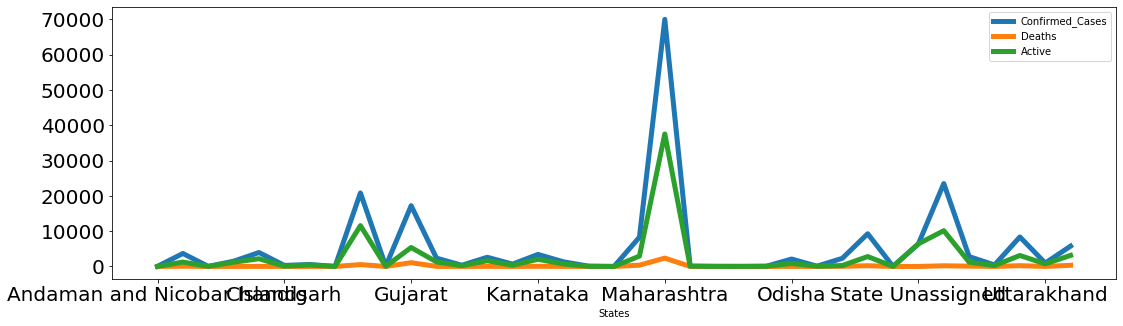

In [6]:
state_data_plot = pd.DataFrame(state_data.iloc[:,0:].values, columns = ['States','Confirmed_Cases', 'Deaths','Active'])
state_data_plot.set_index('States', inplace=True)
state_data_plot.plot(figsize=(18,5), linewidth=5, fontsize=20)

Text(0.5, 1.0, 'States with maximum confirmed cases')

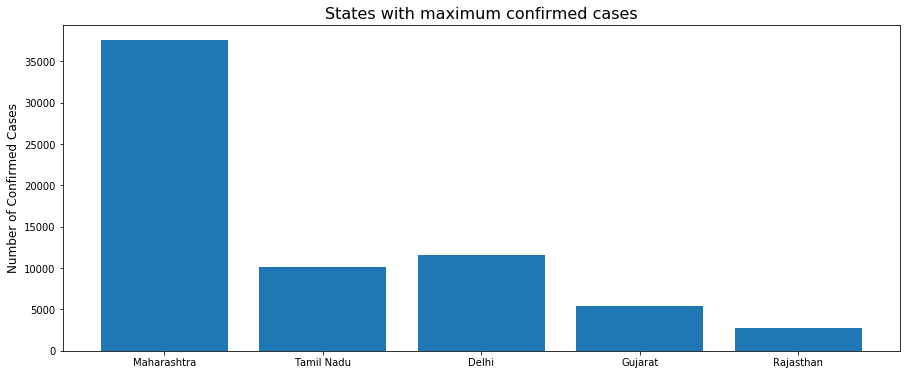

In [7]:
covid_data_states = state_data.sort_values(by='Confirmed_Cases', ascending=False)
fig=plt.figure(figsize=(15, 6))
plt.bar(covid_data_states['States'][:5],covid_data_states['Active'][:5],align='center')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)

In [8]:
response3= requests.get("https://thecampfire.in/api/get_daily_count")
data4 = response3.json()
print("Current active cases in India as of {} ----> {} ".format(data4['lastupdatedtime'], data4['active']))
print("Current confirmed cases in India as of {} ----> {} ".format(data4['lastupdatedtime'], data4['confirmed']))
print("Current death cases in India as of {} ----> {} ".format(data4['lastupdatedtime'], data4['deaths']))

Current active cases in India as of 02/06/2020 11:14:03 ----> 97914 
Current confirmed cases in India as of 02/06/2020 11:14:03 ----> 199343 
Current death cases in India as of 02/06/2020 11:14:03 ----> 5610 


In [9]:
response2 = requests.get("https://thecampfire.in/api/state_data")
data3 = response2.json()
#state = print("Enter state name to get all district details: ")
state = "West Bengal"
for i in range (0, len(data3)):
    if data3[i]['state'] == state:
        selected_state_districts = data3[i]['districtData']
        for i in selected_state_districts:
            print(i['district'])
            print("Confirmed: ",i['confirmed'])
            print("Active: ",i['active'])
            print("Deceased: ",i['deceased'])
            print('------------------------')

Alipurduar
Confirmed:  5
Active:  5
Deceased:  0
------------------------
Bankura
Confirmed:  43
Active:  25
Deceased:  0
------------------------
Birbhum
Confirmed:  160
Active:  97
Deceased:  0
------------------------
Cooch Behar
Confirmed:  87
Active:  87
Deceased:  0
------------------------
Dakshin Dinajpur
Confirmed:  25
Active:  19
Deceased:  0
------------------------
Darjeeling
Confirmed:  27
Active:  17
Deceased:  1
------------------------
Hooghly
Confirmed:  306
Active:  134
Deceased:  11
------------------------
Howrah
Confirmed:  1107
Active:  631
Deceased:  38
------------------------
Jalpaiguri
Confirmed:  15
Active:  11
Deceased:  0
------------------------
Jhargram
Confirmed:  6
Active:  3
Deceased:  0
------------------------
Kalimpong
Confirmed:  7
Active:  0
Deceased:  1
------------------------
Kolkata
Confirmed:  2179
Active:  1040
Deceased:  214
------------------------
Malda
Confirmed:  142
Active:  84
Deceased:  0
------------------------
Murshidabad
Confirme

Text(0.5, 1.0, 'Age  Categorisation')

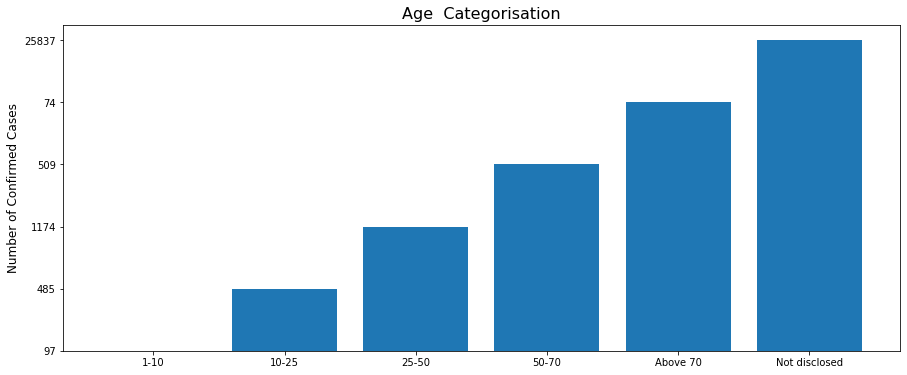

In [10]:
response4 = requests.get("https://thecampfire.in/api/age_count_data")
data5 = response4.json()
age_list = pd.DataFrame(data5.items())
age_cat = ["1-10","10-25","25-50","50-70","Above 70","Not disclosed"]
fig=plt.figure(figsize=(15, 6))
plt.bar(age_cat,age_list[1],align='center')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('Age  Categorisation', size = 16)

In [11]:
response5 = requests.get("https://thecampfire.in/api/daily_total_updates")
data6 = response5.json()
covid_updates = pd.DataFrame(data6, columns=['Date','Confirmed','Recovered','Deceased'])

In [12]:
covid_updates.head()

,Date,Confirmed,Recovered,Deceased
0,17 May,5049,152,2538
1,18 May,4628,131,2482
2,19 May,6154,146,3032
3,20 May,5720,134,3113
4,21 May,6023,148,3131


In [13]:
covid_updates.tail()

,Date,Confirmed,Recovered,Deceased
11,28 May,7254,176,3171
12,29 May,8138,269,11735
13,30 May,8364,205,4303
14,31 May,8789,222,4928
15,01 June,7722,201,3892


In [14]:
response = requests.get("https://api.covid19india.org/data.json")
data1 = response.json()
case_time_series_data = data1['cases_time_series']
data_len = len(case_time_series_data)
data = []
#totalDataList = []
for i in range (0, data_len):
    #print(i)
    date = case_time_series_data[i]['date'] + "2020"
    #print(date)
    confirmed = int(case_time_series_data[i]['dailyconfirmed'])
    deceased = int(case_time_series_data[i]['dailydeceased'])
    recovered = int(case_time_series_data[i]['dailyrecovered'])
    totalconfirmed = int(case_time_series_data[i]['totalconfirmed'])
    data.append([date,confirmed,deceased,recovered,totalconfirmed])

In [ ]:
df = pd.DataFrame(data, columns = ['date','confirmed','deceased','recovered','totalconfirmed'])


In [ ]:
from datetime import datetime

for i in range(0, len(df)):
    date = df['date'][i]
    df['date'][i] = datetime.strptime(date, '%d %B %Y')

In [ ]:
plot_data = pd.DataFrame(df.iloc[:,0:].values, columns = ['date','confirmed','deceased','recovered','totalconfirmed'])


In [ ]:
plot_data[['confirmed']].tail()

In [ ]:
plot_data[['confirmed']].plot(figsize=(20,10), linewidth=5, fontsize=20)

In [ ]:
confirmed = plot_data[['confirmed']]

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_time_series_stationarity(timeseries):
    rolmean = pd.Series(timeseries).rolling(window=15).mean()
    rolstd = pd.Series(timeseries).rolling(window=15).std()
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('------------------------------')
    print('Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
#Estimating & Eliminating Trend
confirmed_log = np.log(confirmed)
plt.plot(confirmed_log)

In [ ]:
#Moving average
moving_avg = pd.Series(confirmed_log).rolling(window=15).mean()
plt.plot(confirmed_log)
plt.plot(moving_avg, color='red')

In [ ]:
confirmed_log_moving_avg_diff = confirmed_log - moving_avg
confirmed_log_moving_avg_diff.head(15)

In [ ]:
confirmed_log_moving_avg_diff.dropna(inplace=True)
check_time_series_stationarity(confirmed_log_moving_avg_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
cnf = plot_data['confirmed']
for i in range (0, len(cnf)):
    val = cnf[i]
    if val == 0:
        cnf[i] = 1
decomposition = seasonal_decompose(cnf)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig=plt.figure(figsize=(15, 6))
plt.subplot(411)
plt.plot(cnf, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
cnf_decompose = residual
cnf_decompose.dropna(inplace=True)
check_time_series_stationarity(cnf_decompose)